In [1]:
import numpy as np
from scipy.interpolate import CubicSpline

import matplotlib.pyplot as plt
from numpy import cos, sin, log
from math import pi, exp

global x, y

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]
[0.0, 0.02147, 0.29305, 0.494105, 0.541341, 0.516855, 0.468617, 0.416531, 0.367879]


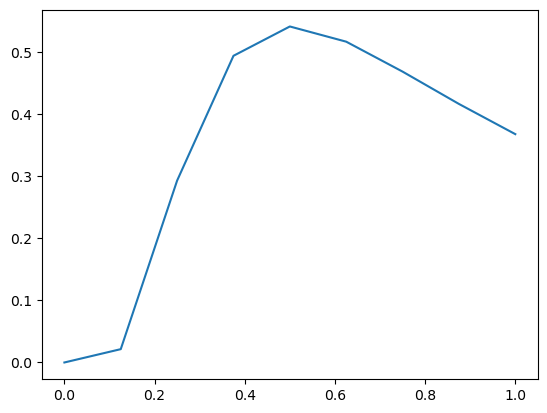

In [2]:
f=open("данные.txt")
x=[]
y=[]
for line in f:
    p=[float(i) for i in line.split()]
    x+=[p[0]]
    y+=[p[1]]
    
print(x)
print(y)

plt.plot(x, y)


# Метод трапеций

In [9]:
def trap_int(n):
    splin=CubicSpline(x, y)
    x1=np.linspace(0, 1, n)
    h=1/n
    f=splin(x1)
    s=0
    for i in range(1,len(x1)):
        In=h*(f[i]+f[i-1])/2
        s+=In
    return s

In [10]:
print(trap_int(555))

0.36443359334297454


In [20]:
i=len(x)
k=0
delta=abs(trap_int(i)-trap_int(i*2))
while delta>0.0001:
    k+=1
    i*=2
    delta=abs(trap_int(i)-trap_int(i*2))

print(i, trap_int(i), k)

2304 0.3649325832752549 8


# Формула Симпсона

In [24]:
def simpson_int(n):
    splin=CubicSpline(x, y)
    x1=np.linspace(0, 1, n)
    h=1/n
    f=splin(x1)
    s=0
    for i in range(1,len(x1)-1):
        In=h*(f[i-1]+f[i]+f[i+1])/3
        s+=In
    return s

In [30]:
i=len(x)
k=0
delta=abs(simpson_int(i)-simpson_int(i*2))
while delta>0.0001:
    k+=1
    i*=2
    delta=abs(simpson_int(i)-simpson_int(i*2))

print(i, simpson_int(i), k)

4608 0.36497190131803214 9
